In [2]:
#importing necessary libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv(r'C:\Users\katku\Downloads\spotify-2023.csv',encoding='ISO-8859-1')

In [8]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


# Data Cleaning

In [9]:
#Checking for the duplicate values - 
df.duplicated().sum()

0

In [10]:
#Checking duplicate values for a specific column 
df["track_name"].duplicated().sum()

10

In [12]:
#Dropping duplicate values for the track_name column 
df.drop_duplicates(subset=["track_name"] , inplace=True)

In [13]:
#Dropping unnecessary columns 
df.drop(columns=["key","in_apple_charts","in_deezer_charts","in_shazam_charts"] , inplace=True)

In [14]:
#Checking for null values 
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_deezer_playlists     0
bpm                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 952
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            943 non-null    object
 1   artist(s)_name        943 non-null    object
 2   artist_count          943 non-null    int64 
 3   released_year         943 non-null    int64 
 4   released_month        943 non-null    int64 
 5   released_day          943 non-null    int64 
 6   in_spotify_playlists  943 non-null    int64 
 7   in_spotify_charts     943 non-null    int64 
 8   streams               943 non-null    object
 9   in_apple_playlists    943 non-null    int64 
 10  in_deezer_playlists   943 non-null    object
 11  bpm                   943 non-null    int64 
 12  mode                  943 non-null    object
 13  danceability_%        943 non-null    int64 
 14  valence_%             943 non-null    int64 
 15  energy_%              943 non-null    in

In [16]:
#Changing the data type for 'streams' column from object to int 
df['streams'] =pd.to_numeric(df['streams'] , errors='coerce')

In [17]:
#ensuring all values are non-negative 
df["streams"] = df["streams"].abs() 

In [20]:
# Changing the 'artist(s)_name' column name to artistName 
df.rename(columns={"artist(s)_name" : "artistName"},inplace=True)

# EDA

In [21]:
#Displaying the name of all the columns present in our data - 
df.columns

Index(['track_name', 'artistName', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists',
       'in_deezer_playlists', 'bpm', 'mode', 'danceability_%', 'valence_%',
       'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',
       'speechiness_%'],
      dtype='object')

In [22]:
#Displaying the shape of the data (number of rows,number of columns)
df.shape

(943, 20)

In [23]:
#Displaying the first 5 rows of the dataset 
df.head()

,track_name,artistName,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_deezer_playlists,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,45,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,58,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,91,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,125,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,87,144,Minor,65,23,80,14,63,11,6


In [24]:
# Generate descriptive statistics for the DataFrame 'df'
# This includes count, mean, standard deviation, min, max, and quartiles
df.describe().T #Transposing it to get a better view 

,count,mean,std,min,25%,50%,75%,max
artist_count,943.0,1.559915e+00,8.960664e-01,1.0,1.000000e+00,1.0,2.0,8.000000e+00
released_year,943.0,2.018319e+03,1.088265e+01,1930.0,2.020000e+03,2022.0,2022.0,2.023000e+03
released_month,943.0,6.032874e+00,3.572123e+00,1.0,3.000000e+00,6.0,9.0,1.200000e+01
released_day,943.0,1.394062e+01,9.208869e+00,1.0,6.000000e+00,13.0,22.0,3.100000e+01
in_spotify_playlists,943.0,5.213311e+03,7.930899e+03,31.0,8.740000e+02,2224.0,5516.5,5.289800e+04
in_spotify_charts,943.0,1.213468e+01,1.964148e+01,0.0,0.000000e+00,4.0,16.0,1.470000e+02
streams,942.0,5.155457e+08,5.693522e+08,2762.0,1.402478e+08,287690252.0,674004814.0,3.703895e+09
in_apple_playlists,943.0,6.765005e+01,8.653761e+01,0.0,1.300000e+01,34.0,86.5,6.720000e+02
bpm,943.0,1.223489e+02,2.807943e+01,65.0,9.900000e+01,120.0,140.0,2.060000e+02
danceability_%,943.0,6.695016e+01,1.465298e+01,23.0,5.700000e+01,69.0,78.0,9.600000e+01


In [27]:
#Displaying the mean for 'energy_%' column  
df['energy_%'].mean()

64.34888653234358

In [28]:
#Displaying the median for 'acousticness_%' column  
df['acousticness_%'].median()

18.0

In [29]:
#Counting the occurence of each unique value present in our 'artistName' column 
df['artistName'].value_counts().head(5)

Taylor Swift    34
The Weeknd      21
SZA             19
Bad Bunny       19
Harry Styles    16
Name: artistName, dtype: int64

In [30]:
#Counting the occurence of each unique value present in our 'released_year' column 
df['released_year'].value_counts().head(5)

2022    396
2023    175
2021    117
2020     37
2019     36
Name: released_year, dtype: int64

In [31]:
# Group the DataFrame by artist name, sum the streams for each artist,
# then sort in descending order to get the top 10 artists by total streams
x = df.groupby('artistName')['streams'].sum().sort_values(ascending=False).reset_index()
print(x.head(10))

        artistName       streams
0     Taylor Swift  1.405366e+10
1       Ed Sheeran  1.390895e+10
2       The Weeknd  1.375285e+10
3     Harry Styles  1.131781e+10
4        Bad Bunny  9.997800e+09
5   Olivia Rodrigo  7.442149e+09
6           Eminem  6.183806e+09
7       Bruno Mars  5.846921e+09
8   Arctic Monkeys  5.569807e+09
9  Imagine Dragons  5.272485e+09


In [32]:
# Group by track name, sum the streams for each track,sort in descending order, and reset the index
x = df.groupby('track_name')['streams'].sum().sort_values(ascending=False).reset_index()
print(x.head(10))  # Display the top 10 tracks by total streams 

                                      track_name       streams
0                                Blinding Lights  3.703895e+09
1                                   Shape of You  3.562544e+09
2                              Someone You Loved  2.887242e+09
3                                   Dance Monkey  2.864792e+09
4  Sunflower - Spider-Man: Into the Spider-Verse  2.808097e+09
5                                      One Dance  2.713922e+09
6                      STAY (with Justin Bieber)  2.665344e+09
7                                       Believer  2.594040e+09
8                                         Closer  2.591224e+09
9                                        Starboy  2.565530e+09


In [33]:
# Group by track name, sum the streams for each released_year,sort in descending order, and reset the index
x = df.groupby('released_year')['streams'].sum().sort_values(ascending=False).reset_index()
print(x.head(10))  # Display the top 10 tracks

   released_year       streams
0           2022  1.138327e+11
1           2021  7.319057e+10
2           2019  3.787093e+10
3           2020  3.470373e+10
4           2017  3.145764e+10
5           2023  2.580848e+10
6           2016  2.024294e+10
7           2014  1.643261e+10
8           2013  1.586250e+10
9           2018  1.503052e+10


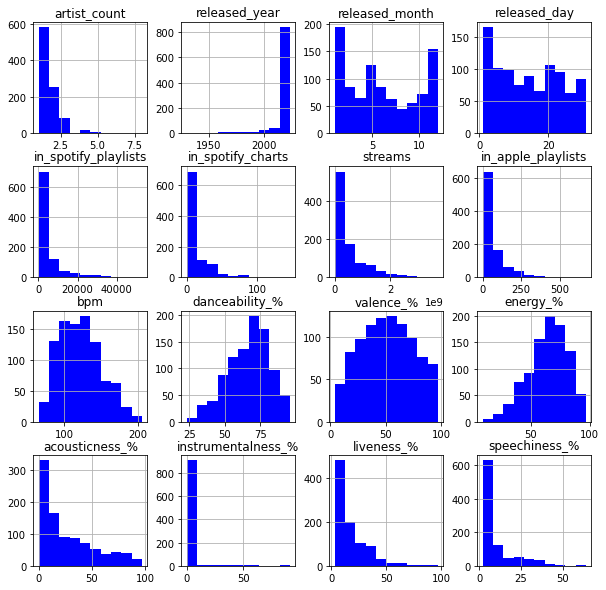

In [35]:
#Creating a histogram for each numerical column in the Dataframe - 
df.hist(figsize=(10,10),color='Blue');

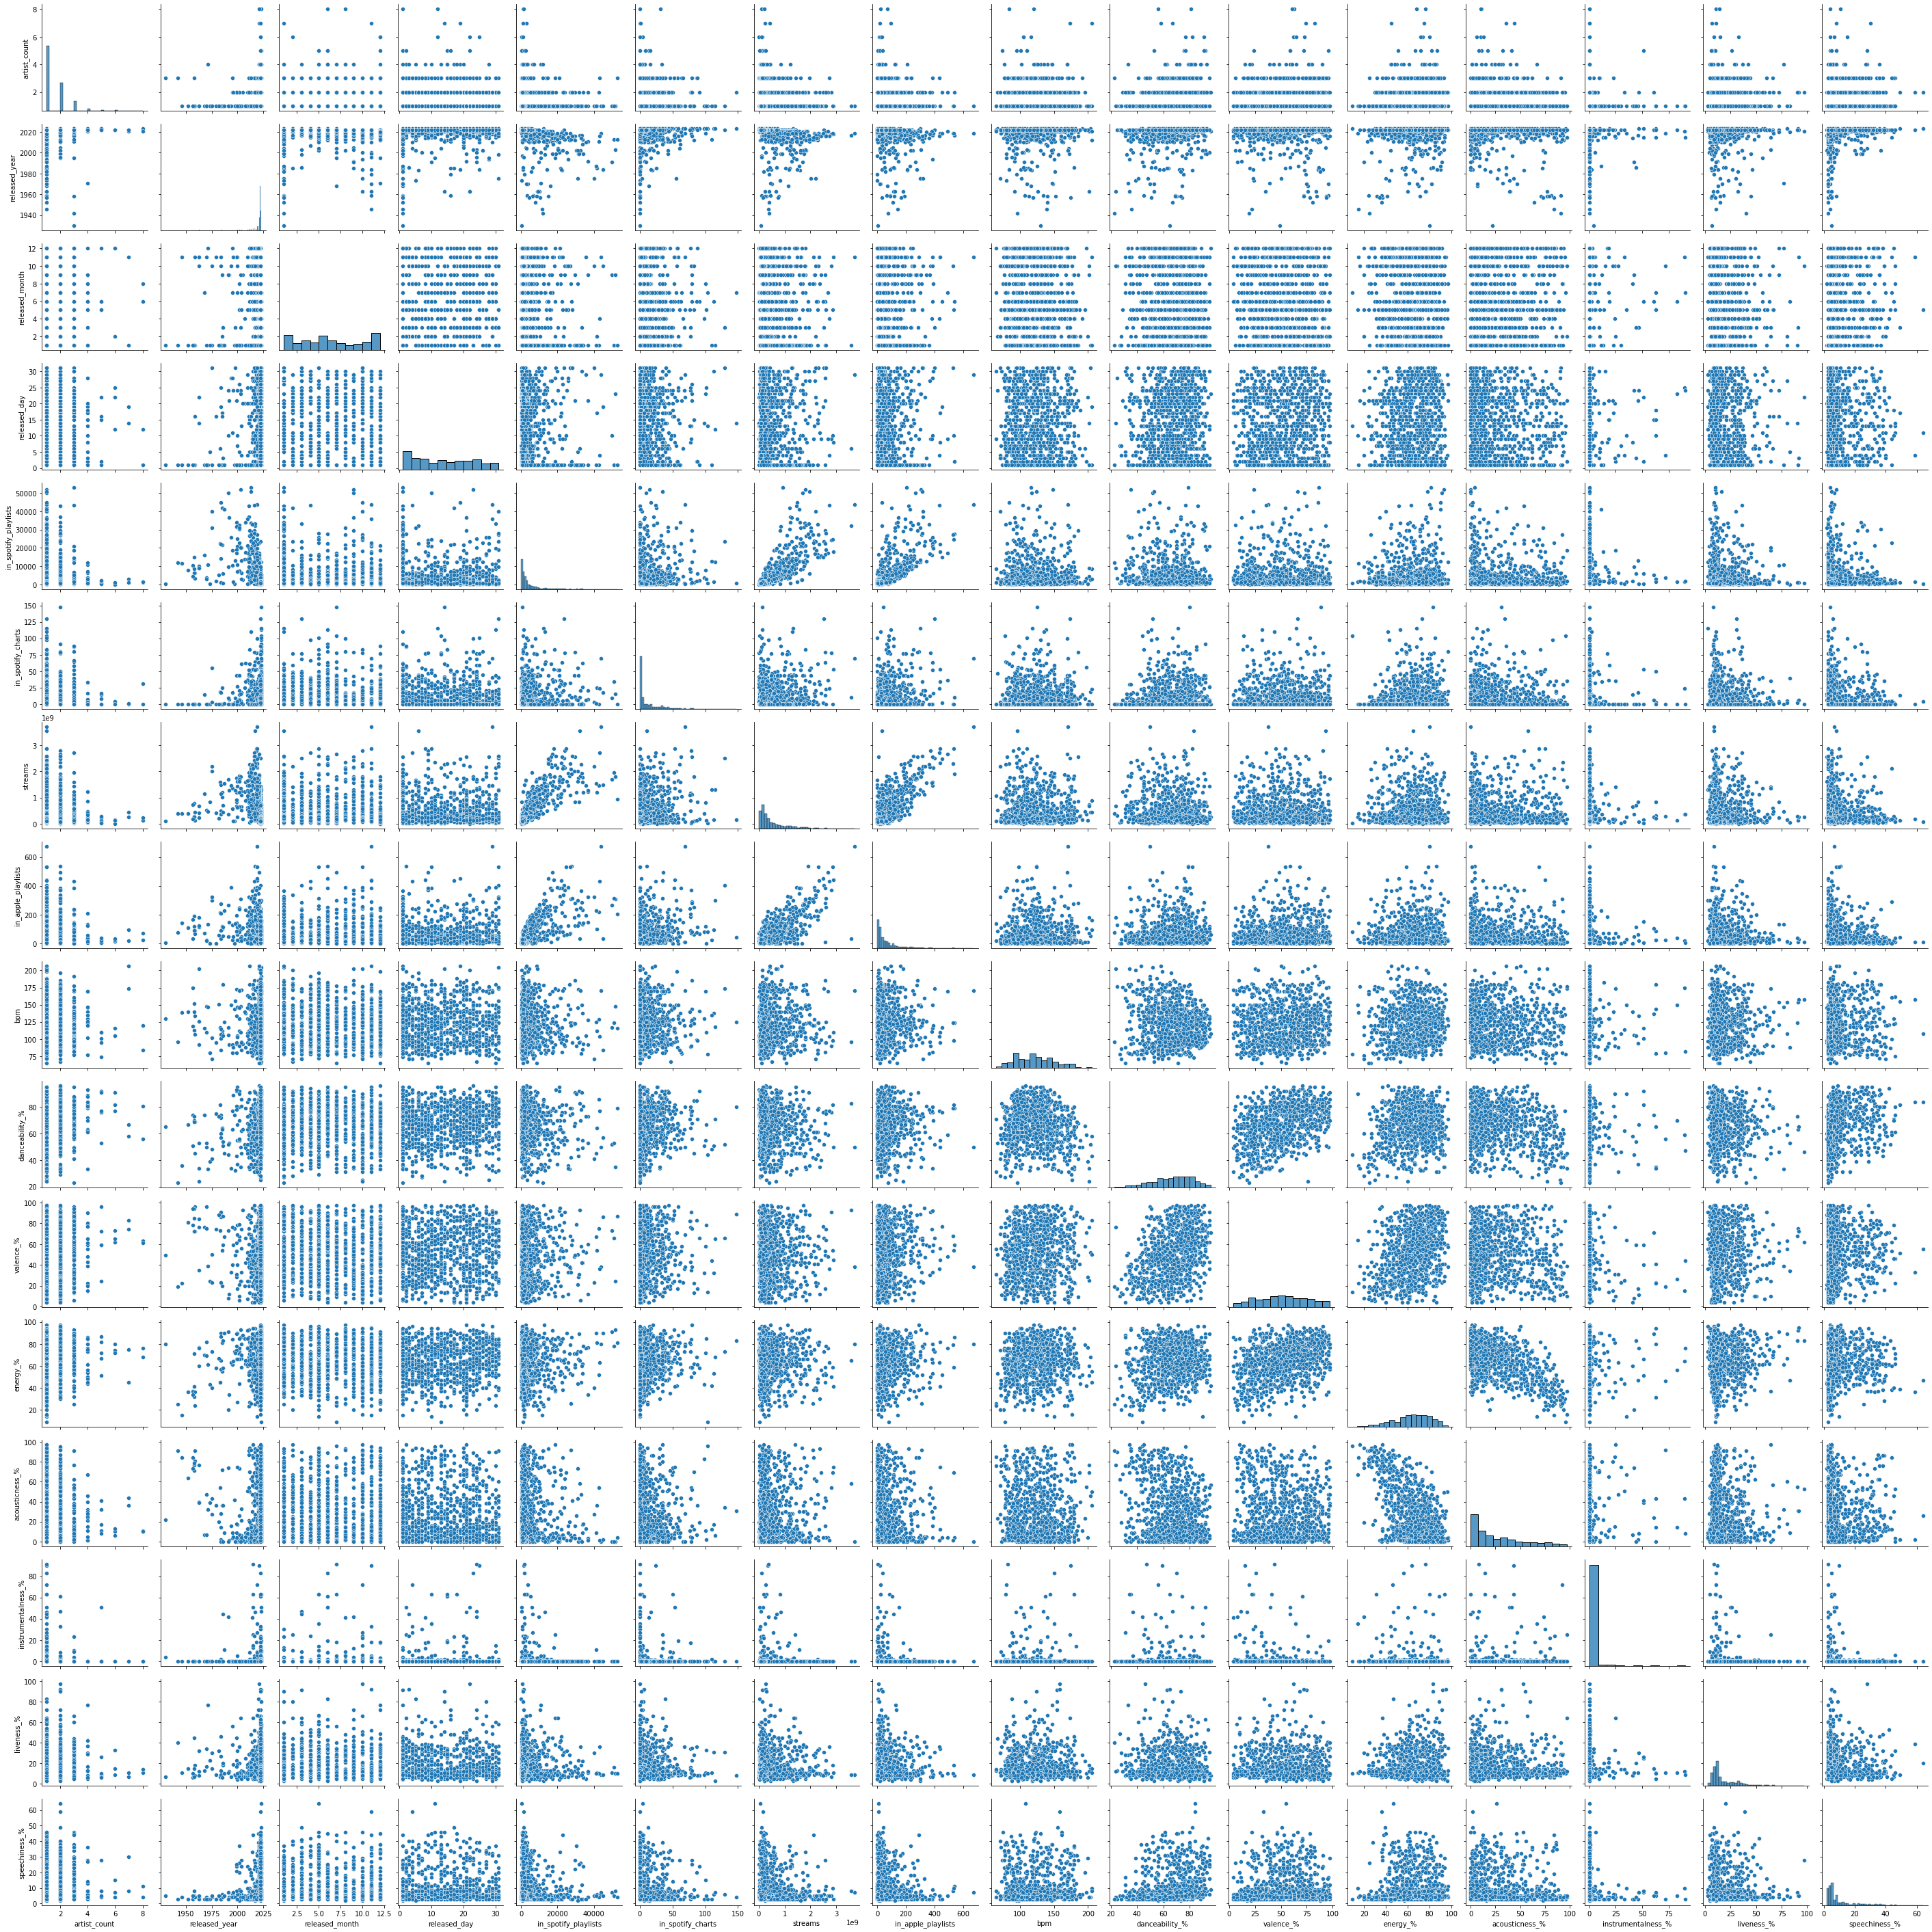

In [36]:
#Creating a pairplot for all the columns - 
sns.pairplot(df)

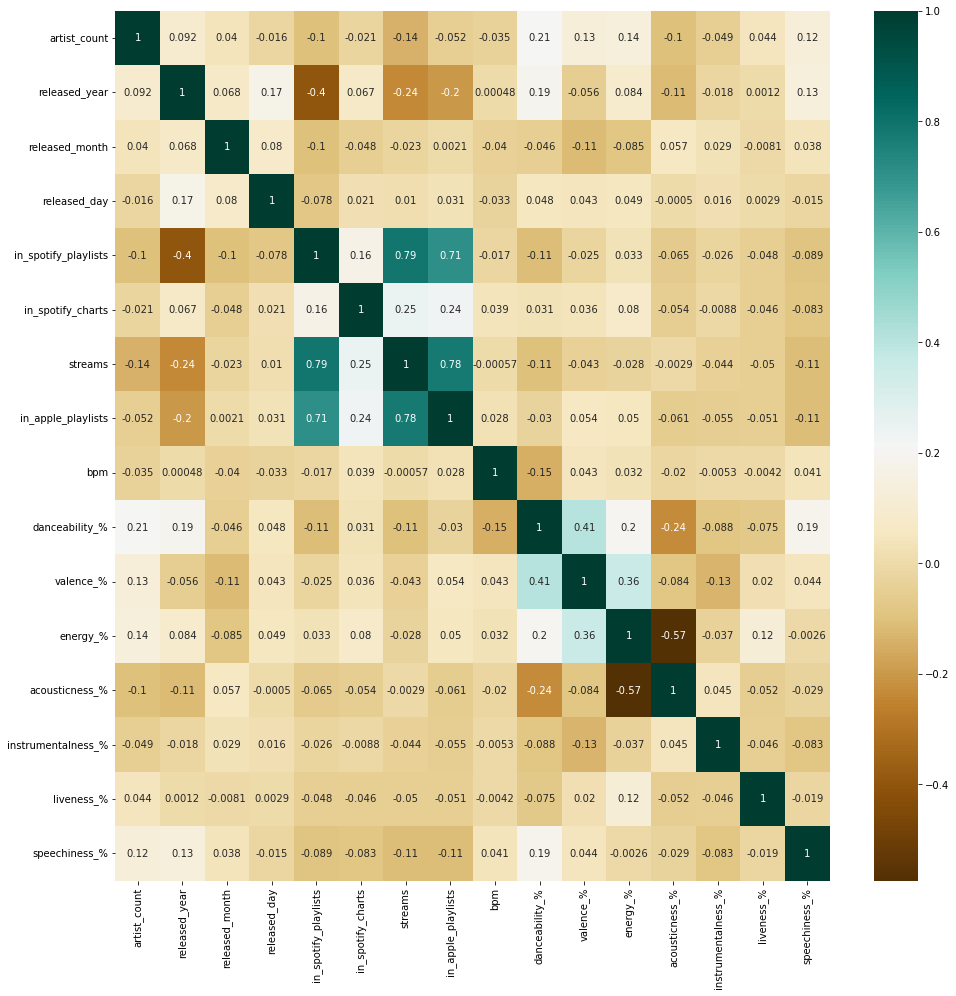

In [37]:
# Creating a correlation heatmap for all the numerical columns
plt.figure(figsize=(16,16))
numeric = df.select_dtypes([int,float])
corr = numeric.corr();
sns.heatmap(corr , annot =True,cmap='BrBG');

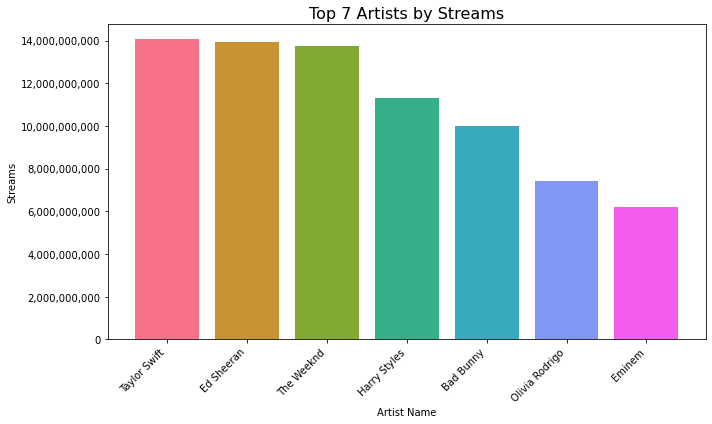

In [38]:
import matplotlib.ticker as mtick #module provides tools to control and customize tick locators and formatters in Matplotlib plots
#grouping and getting "Top 7 Artists by Streams"
x = df.groupby('artistName')['streams'].sum().sort_values(ascending=False).head(7)
#Creating a barplot to visualize the "Top 10 Artists by Streams"
plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", 7)
plt.bar(x.index, x.values, color=colors)
plt.title("Top 7 Artists by Streams", fontsize=16)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel("Artist Name")
plt.ylabel("Streams")
plt.xticks(rotation=45, ha='right')
plt.tight_layout();

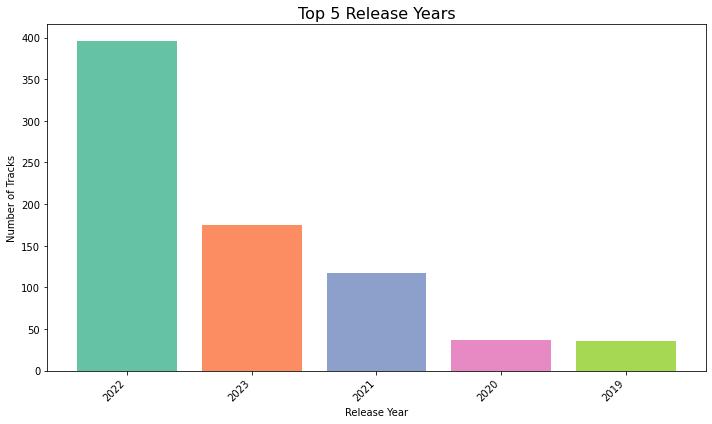

In [39]:
#Counting the songs release
x = df['released_year'].value_counts().sort_values(ascending=False).head(5)
#Creating a bar plot to visualize the "Top 5 Release years"
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Set2", 5)
plt.bar(x.index.astype(str), x.values, color=colors)
plt.title("Top 5 Release Years", fontsize=16)
plt.xlabel("Release Year")
plt.ylabel("Number of Tracks")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

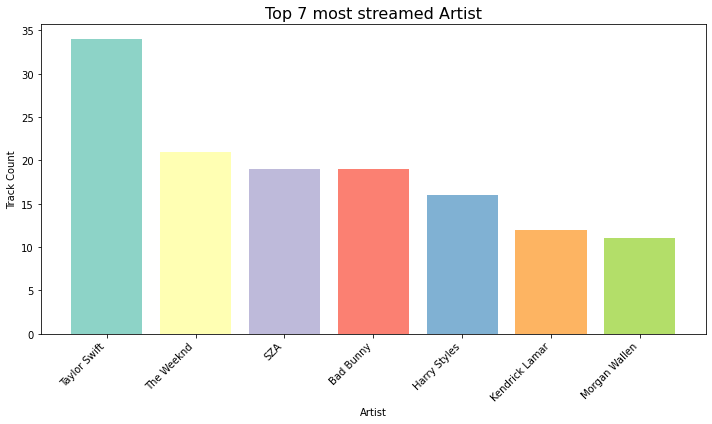

In [40]:
# Counting the occurence of each unique 'artistName'
x=df['artistName'].value_counts().sort_values(ascending=False).head(7)
#Creating a bar plot to visualize the "Top 7 most streamed Artist"
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Set3", 7)
plt.bar(x.index, x.values, color=colors)
plt.title("Top 7 most streamed Artist", fontsize=16)
plt.xlabel("Artist")
plt.ylabel("Track Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

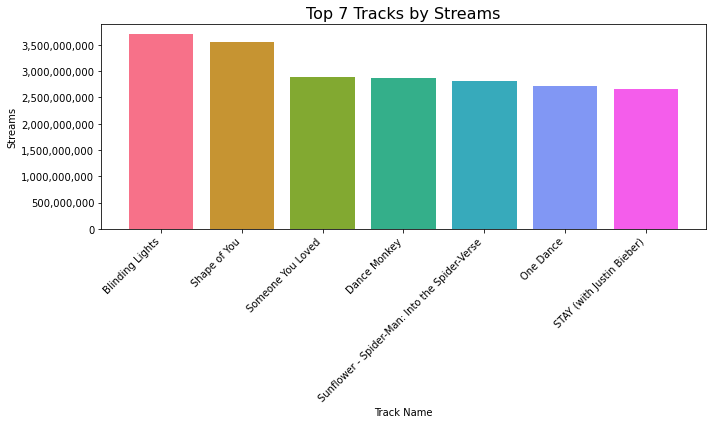

In [41]:
# Grouping and getting the top 7 tracks by streams
x = df.groupby('track_name')['streams'].sum().sort_values(ascending=False).reset_index().head(7)
plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", 7)
plt.bar(x['track_name'], x['streams'], color=colors)

# Apply formatting to the y-axis (streams) for better readability
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{int(y):,}'))
plt.title("Top 7 Tracks by Streams", fontsize=16)
plt.xlabel("Track Name")
plt.ylabel("Streams")
plt.xticks(rotation=45, ha='right')
plt.tight_layout();

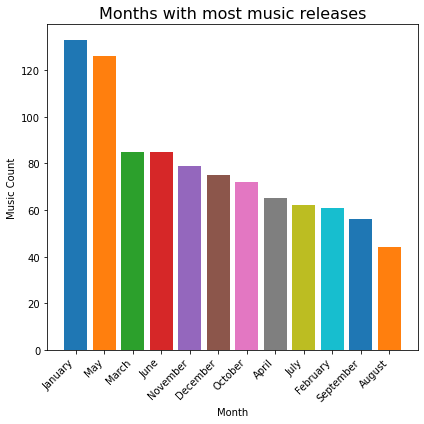

In [42]:
#Counting the occurence of unique 'months_name'
x= df['released_month'].value_counts().sort_values(ascending=False).head(12)

# Creating a mapping from month number to month name
import calendar
month_names = x.index.map(lambda month_num: calendar.month_name[month_num])

#Creating a bar plot to visualize the "Top months in Which most songs released"
plt.figure(figsize=(6, 6))
colors = sns.color_palette("tab10", 12)
plt.bar(month_names, x.values, color=colors)
plt.title("Months with most music releases", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Music Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

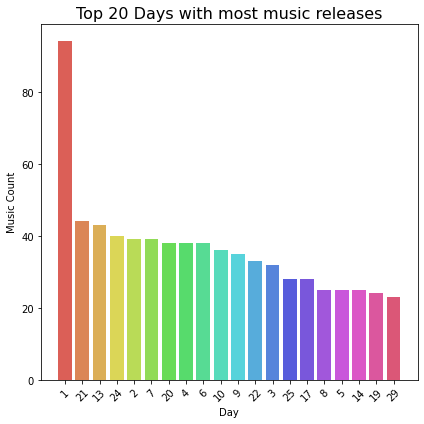

In [43]:
#Counting the occurence of unique 'Days'
x= df['released_day'].value_counts().sort_values(ascending=False).head(20)

#Creating a bar plot to visualize the "Top 20 Days with most music releases"
plt.figure(figsize=(6, 6))
colors = sns.color_palette("hls", 20)
plt.bar(x.index.astype(str), x.values, color=colors)
plt.title("Top 20 Days with most music releases", fontsize=16)
plt.xlabel("Day")
plt.ylabel("Music Count")
plt.xticks(rotation=45, ha='center')
plt.tight_layout()

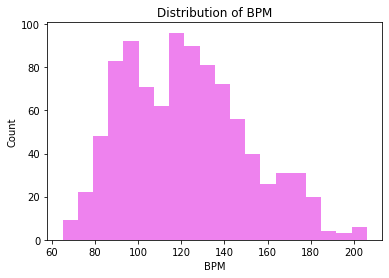

In [44]:
#Distribution of Track BPM (Beats Per Minute)
plt.hist(df['bpm'], bins=20, color='Violet')
plt.title('Distribution of BPM')
plt.xlabel('BPM')
plt.ylabel('Count');

# Displaying Top 10 tracks streamed in 2023,2022,2021 and 2020 

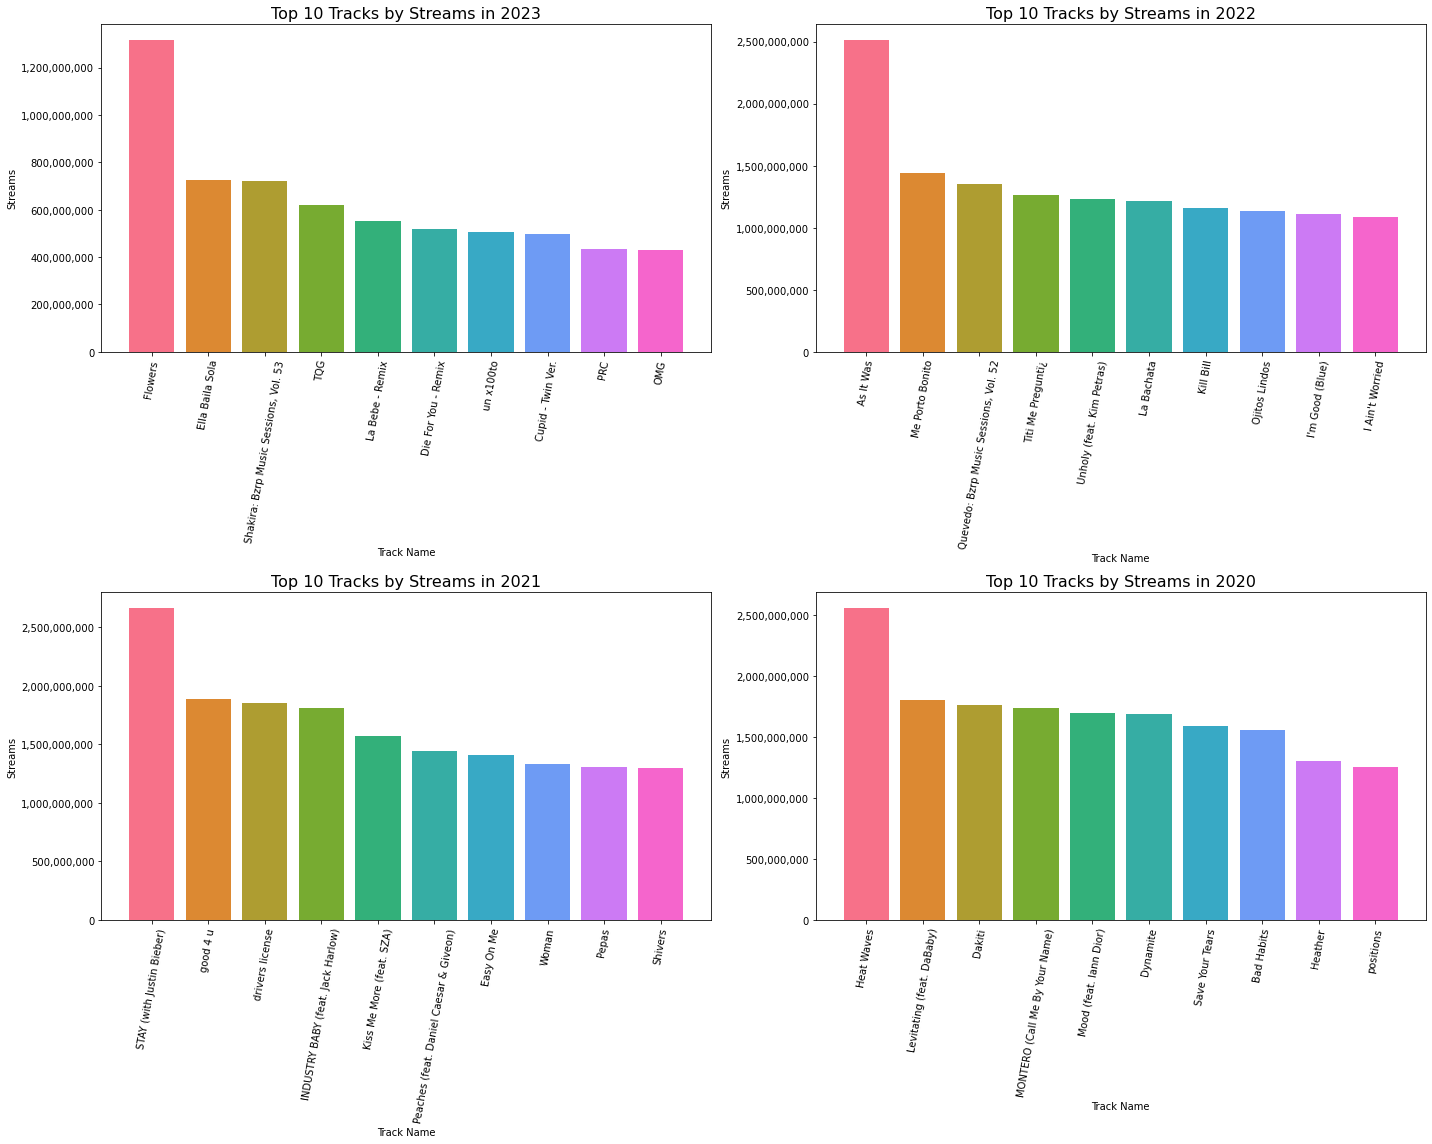

In [46]:
# Create a figure with four subplots in a 2x2 grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))


# Function to create bar plot for a given year and axis
def create_bar_plot(year, ax):
    df_year = df[df['released_year'] == year]
    df_year = df_year.groupby('track_name')['streams'].sum().sort_values(ascending=False).reset_index().head(10)
    
    colors = sns.color_palette("husl", 10)
    ax.bar(df_year['track_name'], df_year['streams'], color=colors)
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{int(y):,}'))
    ax.set_title(f"Top 10 Tracks by Streams in {year}", fontsize=16)
    ax.set_xlabel("Track Name")
    ax.set_ylabel("Streams")
    ax.tick_params(axis='x', rotation=80)

# Create plots for each year
create_bar_plot(2023, ax1)
create_bar_plot(2022, ax2)
create_bar_plot(2021, ax3)
create_bar_plot(2020, ax4)

# Adjust layout and display the plot
plt.tight_layout()

# Short Summary

Importing Libraries:
Essential Python libraries for data manipulation, visualization, and statistical analysis were imported:

pandas for data manipulation. matplotlib and seaborn for creating visualizations. numpy for numerical operations. matplotlib.ticker for formatting axis labels.

Loading the Dataset:
The dataset was imported using pandas and contained music-related columns such as track_name, artist(s)name, streams, released_month, audiofeatures (e.g., danceability%, valence_%), and more.

Data cleaning:
Initial checks were performed to identify missing values and duplicated values.

Removed unnecessary columns from the dataframe

Removed duplicate tarcks name and appropriate transformations were applied(e.g.,converting numeric months to names,converting str values into int etc).

Initial Data Exploration:
• Shape and Structure:

– Check the dataset’s dimensions with df.shape. – View column names using df.columns. – Inspect data types with df.dtypes.

• Check for Missing Values: – Identify missing values using df.isnull().sum().

• View Sample Data: – Use df.head() and df.tail() to preview the first and last few rows of the dataset. – Use df.sample() to view random samples.

• Summary Statistics:

Use df.describe() to generate summary statistics for numeric columns.
Exploratory Data analysis:
Descriptive Statistics: Descriptive statistics such as mean, median, and range were calculated for key numerical columns, especially audio features (e.g., danceability_%, energy_%).

Value Counts: For categorical columns like released_month and artist_count, value_counts() was used to examine how many unique values exist and their respective frequencies.

Correlation Analysis: Pairwise correlations between numerical columns such as streams, bpm, and various audio features were computed to understand their relationships.

Visual Analysis: Various visual plots like bar charts, scatter plots, and pie charts were created to better understand patterns and distributions in the dataset.

Data visualization:
1.Created a hsistogram For each numerical column in the Dataframe.

2.Created a pairplot for all the columns in the Dataframe.

3.Created a correlation heatmap for all the numerical columns.

Top Tracks by Streams: A bar chart was created to visualize the top 7 tracks with the highest streams. Stream counts were formatted to display thousands with commas for clarity, using mtick.FuncFormatter.

Top 5 Release years: A bar chart was created to visualize the top 5 years in which most songs released in.

6.Top 7 Most streamed artist: A bar chart was created to visualize the top 7 Most streamed artist.

7.Top 7 Tracks by stream: A bar chart was created to visualize the top 7 Most tracks with highest streams.

8.Monthly Release Distribution: A bar chart was produced to show the distribution of songs released by month. The months were converted to their string names (e.g., January, February) for better interpretability.

9.Days Release Distribution: A bar chart was produced to show the distribution of songs released by Day.

10.Distribution of BPM: A histogram was created to show the Distribution of BPM(Beats per minute)

11.Top 10 tracks streamed in 2023,2022,2021,2020: Different bar chart created for different year to compare the Top 10 tracks streamed in each year.